# Data Preprocessing

In [49]:
# Import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import helper
import importlib
_ = importlib.reload(helper)


Let's read the data into a [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) so that we can begin to understand it.

*Note, we'll set `error_bad_lines=False` when reading the file in as there appear to be a very small number of records which would create a problem otherwise.*

In [50]:
dataset_name = 'ml-100k'
data_folder = f'data/{dataset_name}'


In [51]:
df_interactions = pd.read_csv(
    f'{data_folder}/u.data',
    sep='\t',
    encoding="ISO-8859-1",
    header=None,
#     error_bad_lines=False,
)
df_interactions.head()


,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [52]:
df_interactions = df_interactions.rename(
    columns={
        0:'USER_ID',
        1:'ITEM_ID',
        2:'RATING',
        3:'TIMESTAMP'
    }
)
df_interactions



,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [53]:
df_scaled = helper.scale_minmax(df_interactions, 'RATING', 1, 5)
df_interactions['RATING'] = df_scaled
df_interactions



,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


In [54]:
helper.put_csv(df_interactions, dataset_name, "interactions.csv.gz")


In [55]:
df_users = pd.read_csv(
    f'{data_folder}/u.user', 
    sep='|',
    encoding="ISO-8859-1",
    header=None,
)
df_users.head()


,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [56]:
df_users = df_users.rename(columns={0:'USER_ID', 1:'age', 2:'gender', 3:'occupation', 4:'zip_code'})
df_users


,USER_ID,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [57]:
helper.put_csv(df_users, dataset_name, "users.csv.gz")


In [58]:
df_items = pd.read_csv(
    f'{data_folder}/u.item',
    sep='|',
    encoding="ISO-8859-1",
    error_bad_lines=False,
    header=None,
)
df_items.head()


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df_items = df_items.rename(
    columns={
        0:'ITEM_ID',
        1:'title',
        2:'release_date',
        3:'video_release_date',
        4:'IMDb_URL',
        5:'unknown',
        6:'Action',
        7:'Adventure',
        8:'Animation',
        9:'Children\'s',
        10:'Comedy',
        11:'Crime',
        12:'Documentary',
        13:'Drama',
        14:'Fantasy',
        15:'Film-Noir',
        16:'Horror',
        17:'Musical',
        18:'Mystery',
        19:'Romance',
        20:'Sci-Fi',
        21:'Thriller',
        22:'War',
        23:'Western',
    }
)
df_items


,ITEM_ID,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
helper.put_csv(df_items, dataset_name, "items.csv.gz")


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


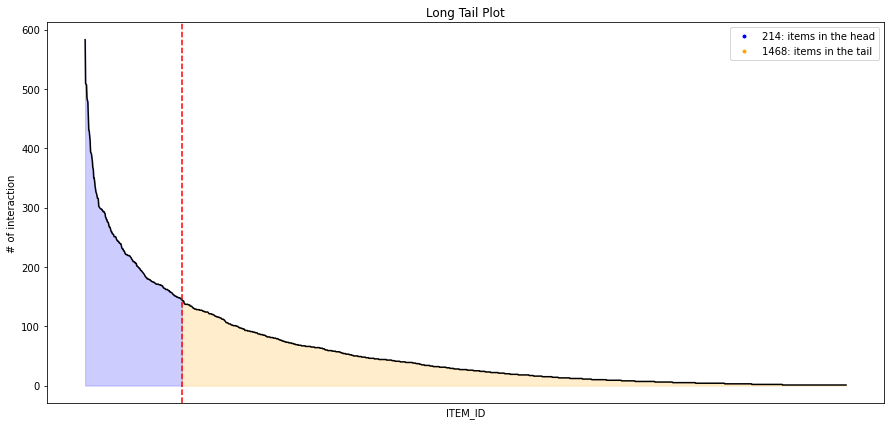

In [61]:
helper.draw_long_tail(df_interactions, "ITEM_ID")


In [62]:
quantiles = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 1]
users = df_interactions['USER_ID'].value_counts()
items = df_interactions['ITEM_ID'].value_counts()


In [63]:
helper.draw_quantile(df_interactions, 'USER_ID', quantiles=quantiles)


alt.Chart(...)

In [64]:
df_qntl = helper.calculate_quantile(df_interactions, 'USER_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
Observation,20.0,20.0,20.0,21.0,23.0,29.0,38.0,50.0,65.0,93.0,127.4,171.6,244.4,310.6,388.0,442.54,737.0


As we can see, only about x% of users have rated y or more items.

In [65]:
helper.draw_quantile(df_interactions, 'ITEM_ID', quantiles=quantiles)


alt.Chart(...)

In [66]:
df_qntl = helper.calculate_quantile(df_interactions, 'ITEM_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
Observation,1.0,1.0,1.0,1.0,2.0,5.0,9.0,16.0,27.0,43.0,65.0,100.0,169.0,229.85,298.38,369.09,583.0


As we can see, only about u% of items have been rated by v users.

### Clean

Let's filter out this long tail.

In [67]:
users = users[users >= 20]
items = items[items >= 5]


In [68]:
df_interactions_reduced = df_interactions.merge(pd.DataFrame({'USER_ID': users.index})).merge(pd.DataFrame({'ITEM_ID': items.index}))
df_interactions_reduced


,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3.0,881250949
1,305,242,5.0,886307828
2,6,242,4.0,883268170
3,234,242,4.0,891033261
4,63,242,3.0,875747190
...,...,...,...,...
99282,653,1620,2.0,886052291
99283,674,1620,4.0,887763035
99284,782,1620,3.0,891499440
99285,880,1620,3.0,880167288


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


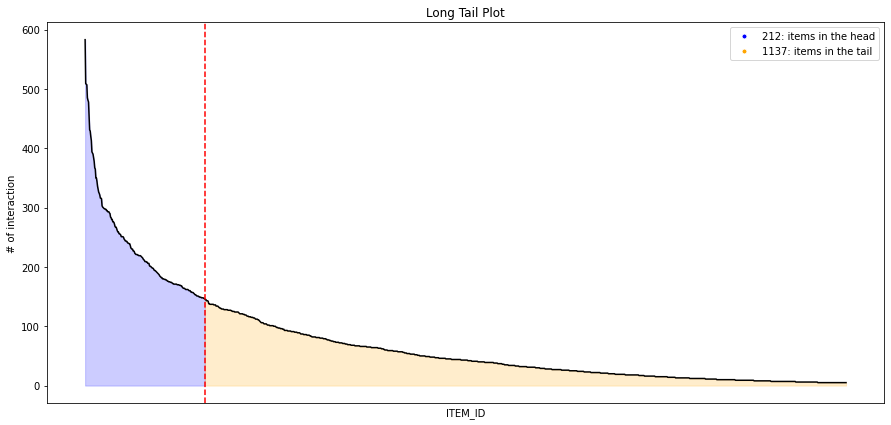

In [69]:
helper.draw_long_tail(df_interactions_reduced, "ITEM_ID")


Now, we'll recreate our customer and product lists since there are customers with more than 5 reviews, but all of their reviews are on products with less than 5 reviews (and vice versa).

In [70]:
helper.draw_quantile(df_interactions_reduced, 'USER_ID', quantiles=quantiles)


alt.Chart(...)

In [71]:
df_qntl = helper.calculate_quantile(df_interactions_reduced, 'USER_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
Observation,19.0,20.0,20.0,21.0,23.0,29.0,38.0,50.0,64.0,93.0,127.4,171.0,241.0,309.7,387.16,433.56,648.0


In [72]:
helper.draw_quantile(df_interactions_reduced, 'ITEM_ID', quantiles=quantiles)


alt.Chart(...)

In [73]:
df_qntl = helper.calculate_quantile(df_interactions_reduced, 'ITEM_ID', quantiles=quantiles)
df_qntl.T


%,0.00,0.01,0.02,0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.95,0.98,0.99,1.00
Observation,5.0,5.0,5.0,6.0,8.0,12.0,19.0,29.0,43.0,59.0,82.0,124.0,182.2,250.6,316.2,391.04,583.0


In [74]:
helper.put_csv(df_interactions_reduced, dataset_name, "interactions_cleaned.csv.gz")

